<a href="https://colab.research.google.com/github/bagasbudhi/Try-Machine-Learning-KNN-SVM/blob/master/Smoking%20Data_Bagas%20Budhi%20Permana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_standarded = pd.read_csv('/content/data.csv')
data_standarded.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.682783,0.053058,-0.873425,1.004731,-0.512681,-0.17667,-0.080821,-0.678658,-0.162295,-0.357314,0.690879,0.176093,-8.651790e-15,1.171652,-9.021463e-02,1
1,-1.576210,2.018819,1.144919,-0.995291,-0.766087,-0.17667,-0.080821,1.473495,-0.162295,-0.557375,1.588193,1.257462,9.680255e-01,-0.332317,-3.063991e-01,0
2,-0.412284,-0.929822,-0.873425,1.004731,0.078600,-0.17667,-0.080821,-0.678658,-0.162295,0.287325,-0.744824,-0.988457,-1.325992e+00,1.004544,5.151019e-01,0
3,0.053287,-0.929822,1.144919,1.004731,0.923287,-0.17667,-0.080821,1.473495,-0.162295,-0.090567,1.139536,0.425640,6.003008e-01,-0.666532,5.151019e-01,1
4,1.682783,-0.929822,-0.873425,1.004731,1.767973,-0.17667,-0.080821,-0.678658,-0.162295,0.087264,0.174923,0.176093,1.522126e-01,-0.499424,-2.199253e-01,0
5,1.333605,1.035939,-0.873425,-0.995291,-0.766087,-0.17667,-0.080821,1.473495,-0.162295,0.776362,2.216313,3.170651,1.705910e+00,0.753883,-7.387681e-01,1
6,1.333605,-0.929822,1.144919,-0.995291,-0.766087,-0.17667,-0.080821,1.473495,-0.162295,0.020578,4.459598,4.418384,-2.349942e-01,-0.081655,-1.334515e-01,0
7,-1.576210,2.018819,1.144919,1.004731,2.190316,-0.17667,-0.080821,-0.678658,-0.162295,1.287627,-1.372943,-1.238003,5.735129e-01,-1.334962,-8.252418e-01,0
8,-0.994247,0.053058,-0.873425,1.004731,0.923287,0.00000,-0.080821,-0.678658,-0.162295,-0.379543,-0.296167,-0.406182,-1.240758e+00,0.837436,-1.334515e-01,0
9,0.635250,0.053058,-0.873425,-0.995291,-0.766087,-0.17667,-0.080821,1.473495,-0.162295,1.976724,0.511416,-0.156635,-2.069107e-02,0.753883,6.144332e-16,0


In [99]:
raw_data.describe()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3390.000000
mean,-6.834913e-17,-4.339367e-16,5.436490e-18,-1.422002e-16,6.209389e-17,-8.470772e-17,-4.076058e-16,1.791749e-16,-1.640772e-17,-1.062408e-16,-1.640281e-16,2.374207e-16,3.161024e-16,5.103751e-16,5.626276e-16,0.150737
std,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,0.357846
min,-2.041780e+00,-9.298222e-01,-8.734246e-01,-9.952913e-01,-7.660865e-01,-1.766699e-01,-8.082120e-02,-6.786585e-01,-1.622951e-01,-2.891413e+00,-2.202959e+00,-2.901647e+00,-2.395072e+00,-2.588269e+00,-1.819690e+00,0.000000
25%,-8.778544e-01,-9.298222e-01,-8.734246e-01,-9.952913e-01,-7.660865e-01,-1.766699e-01,-8.082120e-02,-6.786585e-01,-1.622951e-01,-6.907483e-01,-6.999579e-01,-6.973193e-01,-6.733414e-01,-6.665320e-01,-4.361098e-01,0.000000
50%,-6.310608e-02,5.305814e-02,-8.734246e-01,-9.952913e-01,-7.660865e-01,-1.766699e-01,-8.082120e-02,-6.786585e-01,-1.622951e-01,-4.610913e-02,-1.840023e-01,-7.345304e-02,-9.618421e-02,-8.165541e-02,-9.021463e-02,0.000000
75%,7.516422e-01,1.035939e+00,1.144919e+00,1.004731e+00,9.232865e-01,-1.766699e-01,-8.082120e-02,1.473495e+00,-1.622951e-01,5.985301e-01,5.114160e-01,5.920043e-01,5.363752e-01,5.867750e-01,1.259698e-01,0.000000
max,2.381139e+00,2.018819e+00,1.144919e+00,1.004731e+00,5.146719e+00,5.734706e+00,1.237299e+01,1.473495e+00,6.161616e+00,1.020143e+01,7.286137e+00,4.959068e+00,7.550540e+00,5.600003e+00,1.348617e+01,1.000000


In [100]:
raw_data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [103]:
raw_data["is_smoking"] = raw_data["is_smoking"].map({"YES":1,"NO":0})
raw_data["sex"] = raw_data["sex"].map({"YES":1,"NO":0})

In [86]:
raw_data["education"] = raw_data["education"].fillna(raw_data["education"].mode().iloc[0])

raw_data["cigsPerDay"] = raw_data["cigsPerDay"].fillna(np.mean(raw_data["cigsPerDay"]))

raw_data["BPMeds"] = raw_data["BPMeds"].fillna(raw_data["BPMeds"].mode().iloc[ 0 ])

raw_data["totChol"] = raw_data[ "totChol" ].fillna(np.mean(raw_data["totChol"]))

raw_data["BMI"] = raw_data[ "BMI" ].fillna(raw_data[ "BMI" ].mode().iloc[ 0 ])

raw_data["heartRate"] = raw_data["heartRate"].fillna(np.mean(raw_data["heartRate"]))

raw_data["glucose"] = raw_data["glucose"].fillna(np.mean(raw_data["glucose"]))

#raw_data["sex"] = raw_data["sex"].fillna(np.mean(raw_data["sex"]))


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


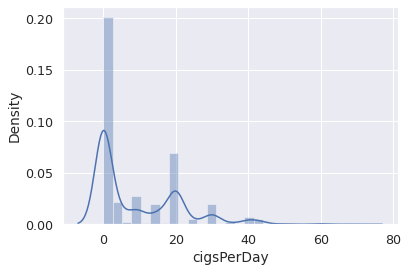

In [87]:
sns.distplot(raw_data["cigsPerDay"])

Text(0.5, 1.0, 'Correlation between features')

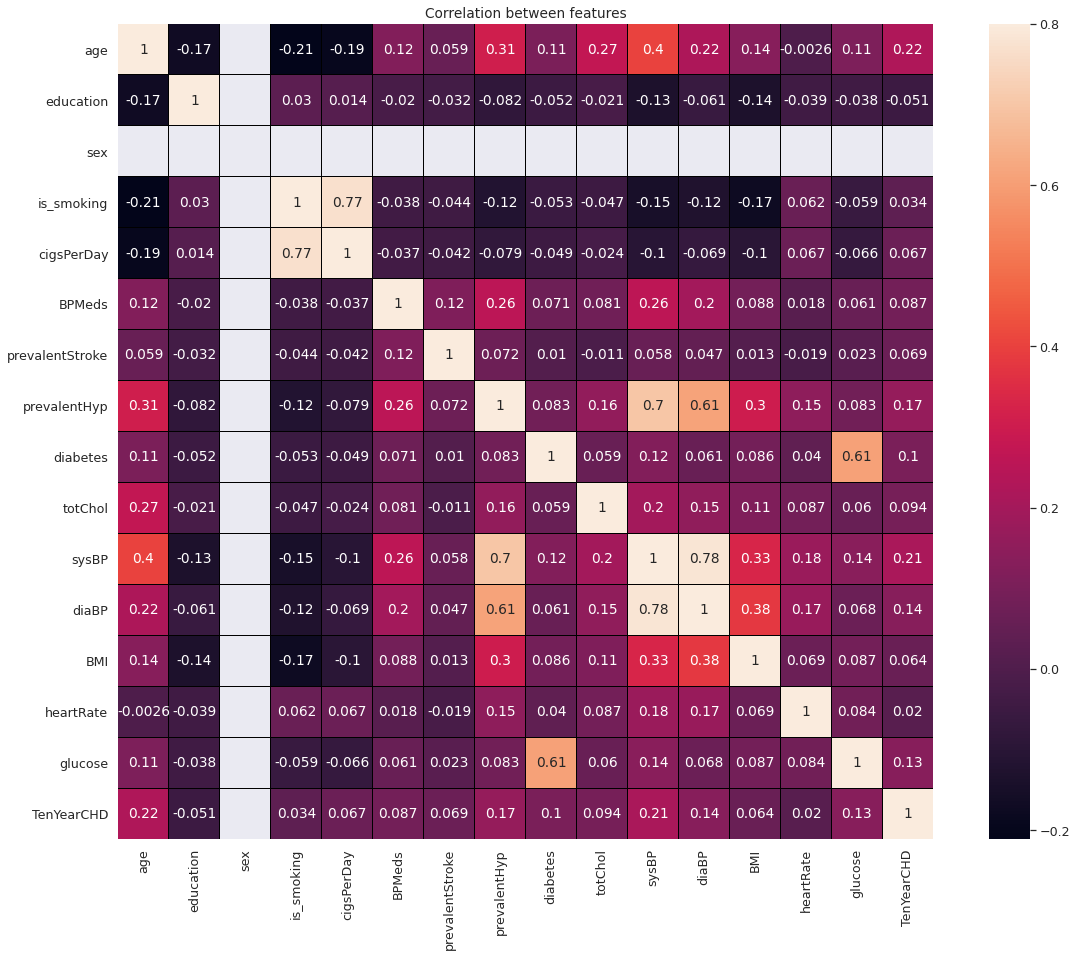

In [88]:
corr= raw_data.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(20,15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,linecolor="black")
plt.title('Correlation between features')

In [90]:
from sklearn.preprocessing import StandardScaler

data_standarded= raw_data


data_standarded=pd.DataFrame(data_standarded, columns = raw_data.drop("id", axis = 1).columns)
data_standarded["TenYearCHD"] = raw_data["TenYearCHD"]
data_standarded.head()

sc=StandardScaler()
raw_data = sc.fit_transform(raw_data)

KeyError: ignored

In [70]:
raw_data

array([[ 1.6827831 ,  0.05305814,         nan, ...,  1.1716516 ,
        -0.09021463,  2.37361557],
       [-1.57621005,  2.01881889,         nan, ..., -0.33231681,
        -0.30639911, -0.42129821],
       [-0.41228392, -0.92982223,         nan, ...,  1.004544  ,
         0.51510189, -0.42129821],
       ...,
       [-0.64506915,  1.03593852,         nan, ..., -0.24876301,
        -0.43610979,  2.37361557],
       [ 1.21721265, -0.92982223,         nan, ...,  0.33611359,
         0.12596984, -0.42129821],
       [ 0.51885698,  1.03593852,         nan, ...,  0.25255979,
         0.4286281 , -0.42129821]])

In [121]:
# Buat data train dan data validasi
from sklearn.model_selection import train_test_split

X = data_standarded.drop(["TenYearCHD"], axis = 1)
Y = data_standarded["TenYearCHD"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) # Data train dan validasi

X_train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,0.518857,-0.929822,-0.873425,-0.995291,-0.766087,-0.17667,-0.080821,-0.678658,-0.162295,0.776362,0.601147,1.007915,-0.519920,-0.332317,-9.021463e-02
2342,0.286072,-0.929822,1.144919,-0.995291,-0.766087,-0.17667,-0.080821,1.473495,-0.162295,-0.379543,0.825476,1.590190,0.006097,1.589421,1.259698e-01
1475,-1.459817,0.053058,1.144919,1.004731,0.923287,-0.17667,-0.080821,-0.678658,-0.162295,-0.379543,-0.116704,0.009729,0.222835,-0.666532,6.144332e-16
2582,1.566390,-0.929822,1.144919,1.004731,0.923287,-0.17667,-0.080821,-0.678658,-0.162295,-0.890809,-0.879421,-1.071639,-0.505308,-0.750086,-6.522943e-01
958,0.518857,0.053058,-0.873425,-0.995291,-0.766087,-0.17667,12.372991,-0.678658,-0.162295,1.865580,0.780610,0.841551,-0.802410,-0.081655,2.114867e+00


In [122]:
# Import needed library
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Train
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,Y_train)
# Test
acc = lr.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.94%


SVM

In [124]:
# Train SVM
svm = SVC()
svm.fit(X_train,Y_train)

# Test
acc = svm.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.50%


KNN

In [125]:
# Train
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# Test
acc = KNN.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


Decision Tree


In [126]:
# Train
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

# Test
acc = tree.score(X_test,Y_test)*100

#accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 76.25%
